__Suzanne Parr__
<br>
Date: Jan. 17, 2024
<br>
PHYS 2030 W24


## <center><font color=#46769B>Exercise 2: Normal distributions and the Central Limit Theorem</font></center>

__Rubric__ (100 points total):

- Part (a) /__20 points__
     
- Part (b) /__40 points__

- Part (c) /__40 points__


## <font color=#46769B>Introduction:</font>

First, in Part (a), we will deal with sampling from normal distributions. As in the lecture notes, you should use the function `numpy.random.normal()` to generate random numbers from a normal distribution.

Second, in Parts (b) and (c), we will perform two numerical tests of the Central Limit Theorem (CLT). Recall that Monte Carlo sampling is a way of estimating the true mean from an approximation computed from random numbers. The CLT tells us how close our estimate is *likely to be* to the true value. Namely, the difference between estimate and true value scales like $1/\sqrt{N}$ and so gets smaller as $N$ becomes larger.

Our goals for this notebook are:
- Gain familiarity with sampling from __normal distributions__
- Perform two numerical experiments to verify the __Central Limit Theorem__

Required reading:
- *Lesson 2: Normal Distribitions*

## <font color=#46769B>Part (a): Sampling from normal distributions</font>

Write a code that performs the following tasks:

- Generate $N = 10^4$ samples for $x$ from $\mathcal{N}(\mu,\sigma)$, where $\mu = 3$ and $\sigma = 1$.

- Calculate and print the mean $\langle x \rangle$ and standard deviation $\Delta x$, and compare to $\mu$ and $\sigma$.

- Make a histogram plot for your samples for $x$ using `matplotlib.pyplot.hist()`.

- On the same plot, plot the normal PDF $\mathcal{N}(\mu,\sigma)$ as a function of $x$.

Be sure that your $x$-axis is labeled, you include a legend, the number of bins is chosen appropriately, and that you have normalized the histogram correctly so that your PDF and histogram are in good agreement.

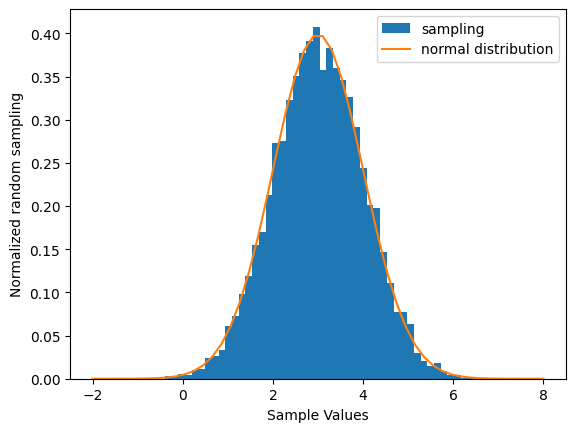

The experimental mean is: 3.019009136888833
The experimental standard deviation is: 1.0018710416140482


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Your answer to Part (a)
# Define our parameters
mu = 3
sigma = 1
num = 10**4

# Draw our samples
x=np.random.normal(mu,sigma,num)

# Compute mean and std dev
mean = np.mean(x)
sdev = np.std(x)

# Plot a histogram
plt.hist(x,bins=50,density=True,label='sampling')

# Compare to the Normal PDF
x = np.linspace(-2,8)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x,y,label='normal distribution')
plt.xlabel('Sample Values')
plt.ylabel('Normalized random sampling')
plt.legend()
plt.show()
print("The experimental mean is:", mean)
print("The experimental standard deviation is:", sdev)


## <font color=#46769B>Part (b): Testing the CLT with flipping a coin</font>

Define a function `coin_flip(num)` that flips a coin $N$ (here $N$ is the same as `num`) times, with probability $p=0.3$ for heads ($x=1$) and probability $1-p=0.7$ for tails ($x=0$), and returns $\langle x \rangle$.

Perform the $N=1000$ coin flip experiment a total of 1000 times and make a list `means` of the 1000 results. That is, you perform the simulation 1000 times and *each simulation* has $N=1000$ coin flips. Perform the following tasks:

- Make a histogram of your results for `means` using `matplotlib.pyplot.hist()`

- On the same plot, use `matplotlib.pyplot.plt()` to plot a Gaussian curve centered at $\mu$ and with width $\sigma/\sqrt{N}$, where $\mu$ and $\sigma$ are the true mean and standard deviation of Bernoulli distribution. Note that you are not plotting $\mathcal{N}(\mu,\sigma)$ as a function of $x$, you are plotting $\mathcal{N}(\mu,\sigma/\sqrt{N})$ as a function of $x$.

Next, repeat these steps with $N=10,000$ and plot your results on the same plot above.

You should see:

- How the distribution of means from the coin flip agrees well with a normal distribution (even though a Bernoulli distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases

For your plot, be sure to:

- Set `alpha=0.5` so you can see all histograms clearly. Choose a suitable number of bins.

- Include an $x$-axis label and a legend.

- Normalize your histograms so they agree with your Gaussian curves.




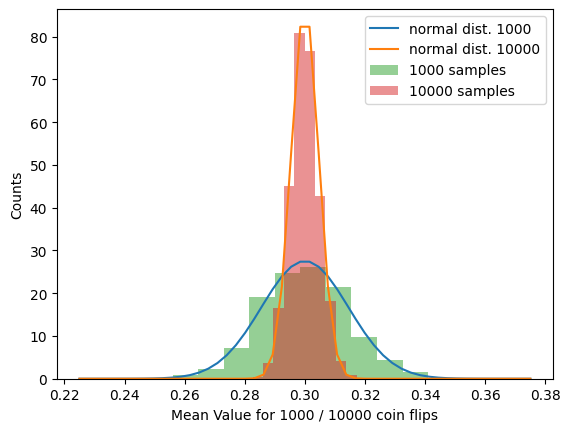

In [31]:
# Your code for Part (b) here
def coin_flip(num):
  options = [1,0] # [heads,tails]
  p=0.3
  prob = [p,1-p]
  x = np.random.choice(options,num,p=prob)
  # Calculate mean for 1000 coin flips
  mean = np.mean(x)
  return mean

num=10**3
num_1=10**3
num_2=10**4
mean_values_1=[]
mean_values_2=[]

for i in range(num):
  this_mean = coin_flip(num_1)
  mean_values_1.append(this_mean)

for j in range(num):
  this_mean = coin_flip(num_2)
  mean_values_2.append(this_mean)

# True mean and std dev
mu=0.3
p=mu
sigma1 = np.sqrt(p*(1-p))/(np.sqrt(num_1))
x = np.linspace(0.225,0.375)
y = 1/np.sqrt(2*np.pi*sigma1**2) * np.exp(-0.5*(x-mu)**2/sigma1**2)
plt.plot(x,y,label='normal dist. 1000')
sigma2 = np.sqrt(p*(1-p))/(np.sqrt(num_2))
x = np.linspace(0.225,0.375)
y = 1/np.sqrt(2*np.pi*sigma2**2) * np.exp(-0.5*(x-mu)**2/sigma2**2)
plt.plot(x,y,label='normal dist. 10000')

plt.hist(mean_values_1, alpha=0.5, density=True, label='1000 samples')
plt.hist(mean_values_2, alpha=0.5, density=True, label='10000 samples')

plt.xlabel('Mean Value for 1000 / 10000 coin flips')
plt.ylabel('Counts')
plt.legend()
plt.show()




## <font color=#46769B>Part (c): Testing the CLT with a uniform distribution</font>

Define a function `sample_uniform(num)` that will generate $N$ samples for $x$ from a uniform distribution within the range $[0,2]$ and returns $\langle x \rangle$.

Now, repeat all the steps of Part (b). (Note that the true mean $\mu$ and standard deviation $\sigma$ will be different from Part (b). You can find formulas for $\mu$, $\sigma$ for a uniform distribution in Lecture Notes 2.)

As in Part (b), you should find:

- How the distribution of means for $x$ agrees well with a normal distribution (even though a uniform distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases


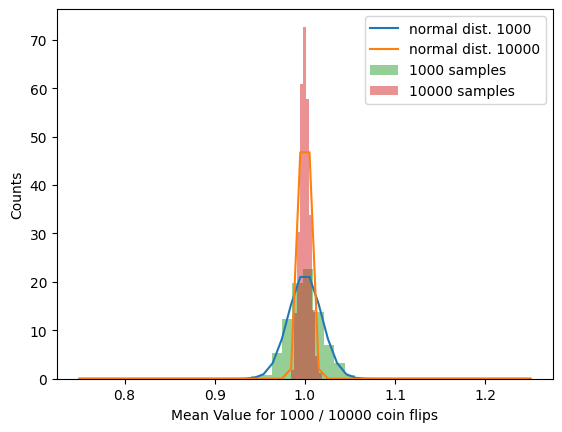

In [40]:
from logging import StringTemplateStyle
# Your code for Part (c) here
def sample_uniform(num):
  x = np.random.uniform(0,2,num)
  mean = np.mean(x)
  return mean

num=10**3
num_1=10**3
num_2=10**4
mean_values_1=[]
mean_values_2=[]

for i in range(num):
  this_mean = sample_uniform(num_1)
  mean_values_1.append(this_mean)

for j in range(num):
  this_mean = sample_uniform(num_2)
  mean_values_2.append(this_mean)

# True mean and std dev
a=0
b=2
mu=(a+b)/2
sigma=(b-a)/np.sqrt(12)

sigma1 = sigma/(np.sqrt(num_1))
x = np.linspace(0.75,1.25)
y = 1/np.sqrt(2*np.pi*sigma1**2) * np.exp(-0.5*(x-mu)**2/sigma1**2)
plt.plot(x,y,label='normal dist. 1000')
sigma2 = sigma/(np.sqrt(num_2))
x = np.linspace(0.75,1.25)
y = 1/np.sqrt(2*np.pi*sigma2**2) * np.exp(-0.5*(x-mu)**2/sigma2**2)
plt.plot(x,y,label='normal dist. 10000')

plt.hist(mean_values_1, alpha=0.5, density=True, label='1000 samples')
plt.hist(mean_values_2, alpha=0.5, density=True, label='10000 samples')

plt.xlabel('Mean Value for 1000 / 10000 coin flips')
plt.ylabel('Counts')
plt.legend()
plt.show()